# arXiv

## abstracts!

In [37]:
import pickle
abstracts_year = pickle.load(open( 'abstracts_year.p', 'rb' ) )

In [38]:
years=[str(number) for number in range(1994,2018)]

In [39]:
years

['1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

In [49]:
stats_abstracts={}
for year in years:
    sentences=[item for sublist in abstracts_year[year] for item in sublist]
    stats_abstracts[year]={'abstracts':len(abstracts_year[year]),'sentences':len(sentences),'total_words':len([item for sublist in sentences for item in sublist]),'different_words':len(set([item for sublist in sentences for item in sublist]))}
    

In [50]:
stats_abstracts

{'1994': {'abstracts': 252,
  'sentences': 1179,
  'total_words': 8432,
  'different_words': 1403},
 '1995': {'abstracts': 253,
  'sentences': 1236,
  'total_words': 8536,
  'different_words': 1414},
 '1996': {'abstracts': 238,
  'sentences': 1185,
  'total_words': 8478,
  'different_words': 1397},
 '1997': {'abstracts': 190,
  'sentences': 999,
  'total_words': 7261,
  'different_words': 1328},
 '1998': {'abstracts': 330,
  'sentences': 1738,
  'total_words': 12383,
  'different_words': 2068},
 '1999': {'abstracts': 325,
  'sentences': 1669,
  'total_words': 11687,
  'different_words': 2133},
 '2000': {'abstracts': 509,
  'sentences': 2828,
  'total_words': 19486,
  'different_words': 2614},
 '2001': {'abstracts': 609,
  'sentences': 3404,
  'total_words': 24686,
  'different_words': 3443},
 '2002': {'abstracts': 700,
  'sentences': 3855,
  'total_words': 26468,
  'different_words': 3324},
 '2003': {'abstracts': 859,
  'sentences': 4639,
  'total_words': 33447,
  'different_words': 39

In [52]:
df_abstracts_stats=pd.DataFrame.from_dict(stats_abstracts)

In [53]:
df_abstracts_stats

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
abstracts,252,253,238,190,330,325,509,609,700,859,...,3642,4870,7580,9115,12337,14916,16290,18801,23598,30505
different_words,1403,1414,1397,1328,2068,2133,2614,3443,3324,3940,...,9402,10779,14619,16544,19741,22788,24520,26727,30289,35384
sentences,1179,1236,1185,999,1738,1669,2828,3404,3855,4639,...,20825,28270,45925,56321,76412,93106,104440,122595,157016,207050
total_words,8432,8536,8478,7261,12383,11687,19486,24686,26468,33447,...,151781,206557,340075,416355,566696,694329,782592,928884,1194423,1582286


## graphs!

In [54]:
import networkx as nx
import itertools

def GoW(text_clean):
    G=nx.Graph()
    for sentence in text_clean:
        unique_words=list(set(sentence))
        pairs=list(itertools.combinations(unique_words,2)) ## sin repeticion!
        for pair in pairs:
            if G.has_edge(pair[0],pair[1])==False:
                G.add_edge(pair[0],pair[1])#,weight=1)
            #else:
            #    x=G[pair[0]][pair[1]]['weight']
            #    G[pair[0]][pair[1]]['weight']=x+1
        
    return G

In [58]:
graphs_year={}
for year in years:
    print(year)
    graphs_year[year]=GoW([item for sublist in abstracts_year[year] for item in sublist])

1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


In [59]:
pickle.dump(graphs_year,open( 'graphs_year.p', 'wb' ) )

In [60]:
graphs_year = pickle.load(open( 'graphs_year.p', 'rb' ) )

In [61]:
graphs_year

{'1994': <networkx.classes.graph.Graph at 0x7faa1702f4e0>,
 '1995': <networkx.classes.graph.Graph at 0x7fa9eb3485f8>,
 '1996': <networkx.classes.graph.Graph at 0x7fa9eb102208>,
 '1997': <networkx.classes.graph.Graph at 0x7fa9eaed4a20>,
 '1998': <networkx.classes.graph.Graph at 0x7fa9eaca6710>,
 '1999': <networkx.classes.graph.Graph at 0x7fa9ea8b58d0>,
 '2000': <networkx.classes.graph.Graph at 0x7fa9ea4670b8>,
 '2001': <networkx.classes.graph.Graph at 0x7fa9e9dc6898>,
 '2002': <networkx.classes.graph.Graph at 0x7fa9e9542390>,
 '2003': <networkx.classes.graph.Graph at 0x7fa9e8d176a0>,
 '2004': <networkx.classes.graph.Graph at 0x7fa9e81ee5c0>,
 '2005': <networkx.classes.graph.Graph at 0x7fa9e76dce80>,
 '2006': <networkx.classes.graph.Graph at 0x7fa9e63fc898>,
 '2007': <networkx.classes.graph.Graph at 0x7fa9e4c74588>,
 '2008': <networkx.classes.graph.Graph at 0x7fa9f088cf98>,
 '2009': <networkx.classes.graph.Graph at 0x7fa9ee067630>,
 '2010': <networkx.classes.graph.Graph at 0x7faa028676d8

In [64]:
!pip install tabulate

    100% |████████████████████████████████| 51kB 27.5MB/s ta 0:00:01
  Running setup.py bdist_wheel for tabulate ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/2a/85/33/2f6da85d5f10614cbe5a625eab3b3aebfdf43e7b857f25f829
Successfully built tabulate


In [65]:
!pip install networkit

  Using cached https://files.pythonhosted.org/packages/3c/0d/767c959cc199013e36634128fae5e77815e19d70d10743c94bf97eae3506/networkit-4.6.tar.gz
  Running setup.py bdist_wheel for networkit ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/2a/6e/3b/94566b55ab37f9dd1833d9c85dfec1ca0adcf52c7d89d7f47f
Successfully built networkit


In [73]:
import networkit as nkit

features={}
for year in years:
    G=graphs_year[year]
    G.remove_edges_from(nx.selfloop_edges(G))
    print(year)
    nodes=len(G.nodes)
    print('nodes: '+str(nodes))
    
    edges=len(G.edges)
    print('edges: '+str(edges))
    
    density=nx.density(G)
    print('density: '+str(density))
    
    average_degree=np.mean(list(dict(nx.degree(G)).values()))
    print('average_degree: '+str(average_degree))
    
    max_degree=np.max(list(dict(nx.degree(G)).values()))
    print('max_degree: '+str(max_degree))
    
    assortativity=nx.degree_pearson_correlation_coefficient(G)
    print('assortativity: '+str(assortativity))
    
    nkit_G=nkit.nxadapter.nx2nk(G)
    
    clustering=np.mean(nkit.centrality.LocalClusteringCoefficient(nkit_G).run().scores())
    print('average_clustering: '+str(clustering))
    
    #v = 0
    #bfs = nkit.distance.BFS(nkit_G, v)
    #bfs.run()
    #bfsdist = bfs.getDistances()
    #shortest=np.mean(bfsdist)

    #print('average_shortest_path: '+str(shortest))
    cc = nkit.components.ConnectedComponents(nkit_G)
    cc.run()
    number_cc=cc.numberOfComponents()
    print('number_connected_components: '+str(number_cc))
    
    core_number=np.mean(nkit.centrality.CoreDecomposition(nkit_G).run().scores())
    print('average_core_number: '+str(core_number))
    
    max_core_number=np.max(nkit.centrality.CoreDecomposition(nkit_G).run().scores())
    print('max_core_number: '+str(max_core_number))
        
    features[year]={'max_core_number':max_core_number,'number_nodes':nodes,'number_edges':edges,'density':density,'average_clustering':clustering,'number_cc':number_cc,'max_degree':max_degree,'average_degree':average_degree,'average_core':core_number,'assortativity':assortativity}

1994
nodes: 1403
edges: 20121
density: 0.020458503939489763
average_degree: 28.682822523164646
max_degree: 420
assortativity: -0.1560582657608321
average_clustering: 0.7164025095879413
number_connected_components: 1
average_core_number: 15.377761938702779
max_core_number: 38.0
1995
nodes: 1414
edges: 19547
density: 0.01956674284352912
average_degree: 27.64780763790665
max_degree: 463
assortativity: -0.15763250313126326
average_clustering: 0.7212439336249946
number_connected_components: 1
average_core_number: 14.867043847241867
max_core_number: 38.0
1996
nodes: 1397
edges: 19311
density: 0.019804000795810916
average_degree: 27.64638511095204
max_degree: 443
assortativity: -0.1561244690308637
average_clustering: 0.7131453188195956
number_connected_components: 3
average_core_number: 14.755905511811024
max_core_number: 36.0
1997
nodes: 1328
edges: 17955
density: 0.02037728911123015
average_degree: 27.04066265060241
max_degree: 408
assortativity: -0.14510718485014693
average_clustering: 0.7

In [74]:
df_features=pd.DataFrame.from_dict(features)

In [75]:
df_features

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
assortativity,-0.156058,-0.157633,-0.156124,-0.145107,-0.120119,-0.130866,-0.153820,-0.149142,-0.160178,-0.164814,...,-0.225130,-0.247955,-0.261503,-0.268694,-0.276838,-0.279634,-0.284423,-2.897160e-01,-2.962253e-01,-3.012987e-01
average_clustering,0.716403,0.721244,0.713145,0.706202,0.699956,0.717112,0.705356,0.702349,0.707182,0.721519,...,0.765765,0.782422,0.801904,0.808577,0.817431,0.827231,0.829881,8.336980e-01,8.420476e-01,8.498609e-01
average_core,15.377762,14.867044,14.755906,14.478916,15.148453,13.696203,17.173680,17.949753,17.693742,20.391878,...,28.613806,31.468132,34.323391,35.492021,37.702497,38.514306,39.741599,4.133969e+01,4.328317e+01,4.495153e+01
average_degree,28.682823,27.647808,27.646385,27.040663,28.486460,25.719644,32.443764,34.007552,33.482551,38.386802,...,53.575622,58.918267,63.949374,66.162838,70.348108,71.709321,73.912153,7.694593e+01,8.050672e+01,8.353821e+01
density,0.020459,0.019567,0.019804,0.020377,0.013782,0.012064,0.012416,0.009880,0.010076,0.009745,...,0.005699,0.005467,0.004375,0.003999,0.003564,0.003147,0.003014,2.879067e-03,2.658040e-03,2.360970e-03
max_core_number,38.000000,38.000000,36.000000,34.000000,37.000000,34.000000,50.000000,56.000000,56.000000,71.000000,...,156.000000,183.000000,232.000000,255.000000,290.000000,319.000000,339.000000,3.640000e+02,4.000000e+02,4.450000e+02
max_degree,420.000000,463.000000,443.000000,408.000000,514.000000,516.000000,753.000000,990.000000,938.000000,1118.000000,...,2696.000000,3266.000000,4461.000000,4831.000000,5745.000000,6541.000000,6874.000000,7.476000e+03,8.237000e+03,9.547000e+03
number_cc,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,5.000000,2.000000,3.000000,3.000000,...,3.000000,4.000000,9.000000,7.000000,10.000000,7.000000,13.000000,1.100000e+01,5.000000e+00,1.500000e+01
number_edges,20121.000000,19547.000000,19311.000000,17955.000000,29455.000000,27430.000000,42404.000000,58544.000000,55648.000000,75622.000000,...,251859.000000,317540.000000,467374.000000,547299.000000,694371.000000,817056.000000,906163.000000,1.028267e+06,1.219234e+06,1.477958e+06
number_nodes,1403.000000,1414.000000,1397.000000,1328.000000,2068.000000,2133.000000,2614.000000,3443.000000,3324.000000,3940.000000,...,9402.000000,10779.000000,14617.000000,16544.000000,19741.000000,22788.000000,24520.000000,2.672700e+04,3.028900e+04,3.538400e+04


## $k-shell$

In [76]:
k_decomposition_size={}
for year in years:
    G=graphs_year[year]
    print(year)
    nkit_G=nkit.nxadapter.nx2nk(G)
    nkit_G.removeSelfLoops()
    coreDec = nkit.centrality.CoreDecomposition(nkit_G)
    coreDec.run()
    
    k_decomposition_size[year]=coreDec.getPartition().subsetSizeMap()

1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


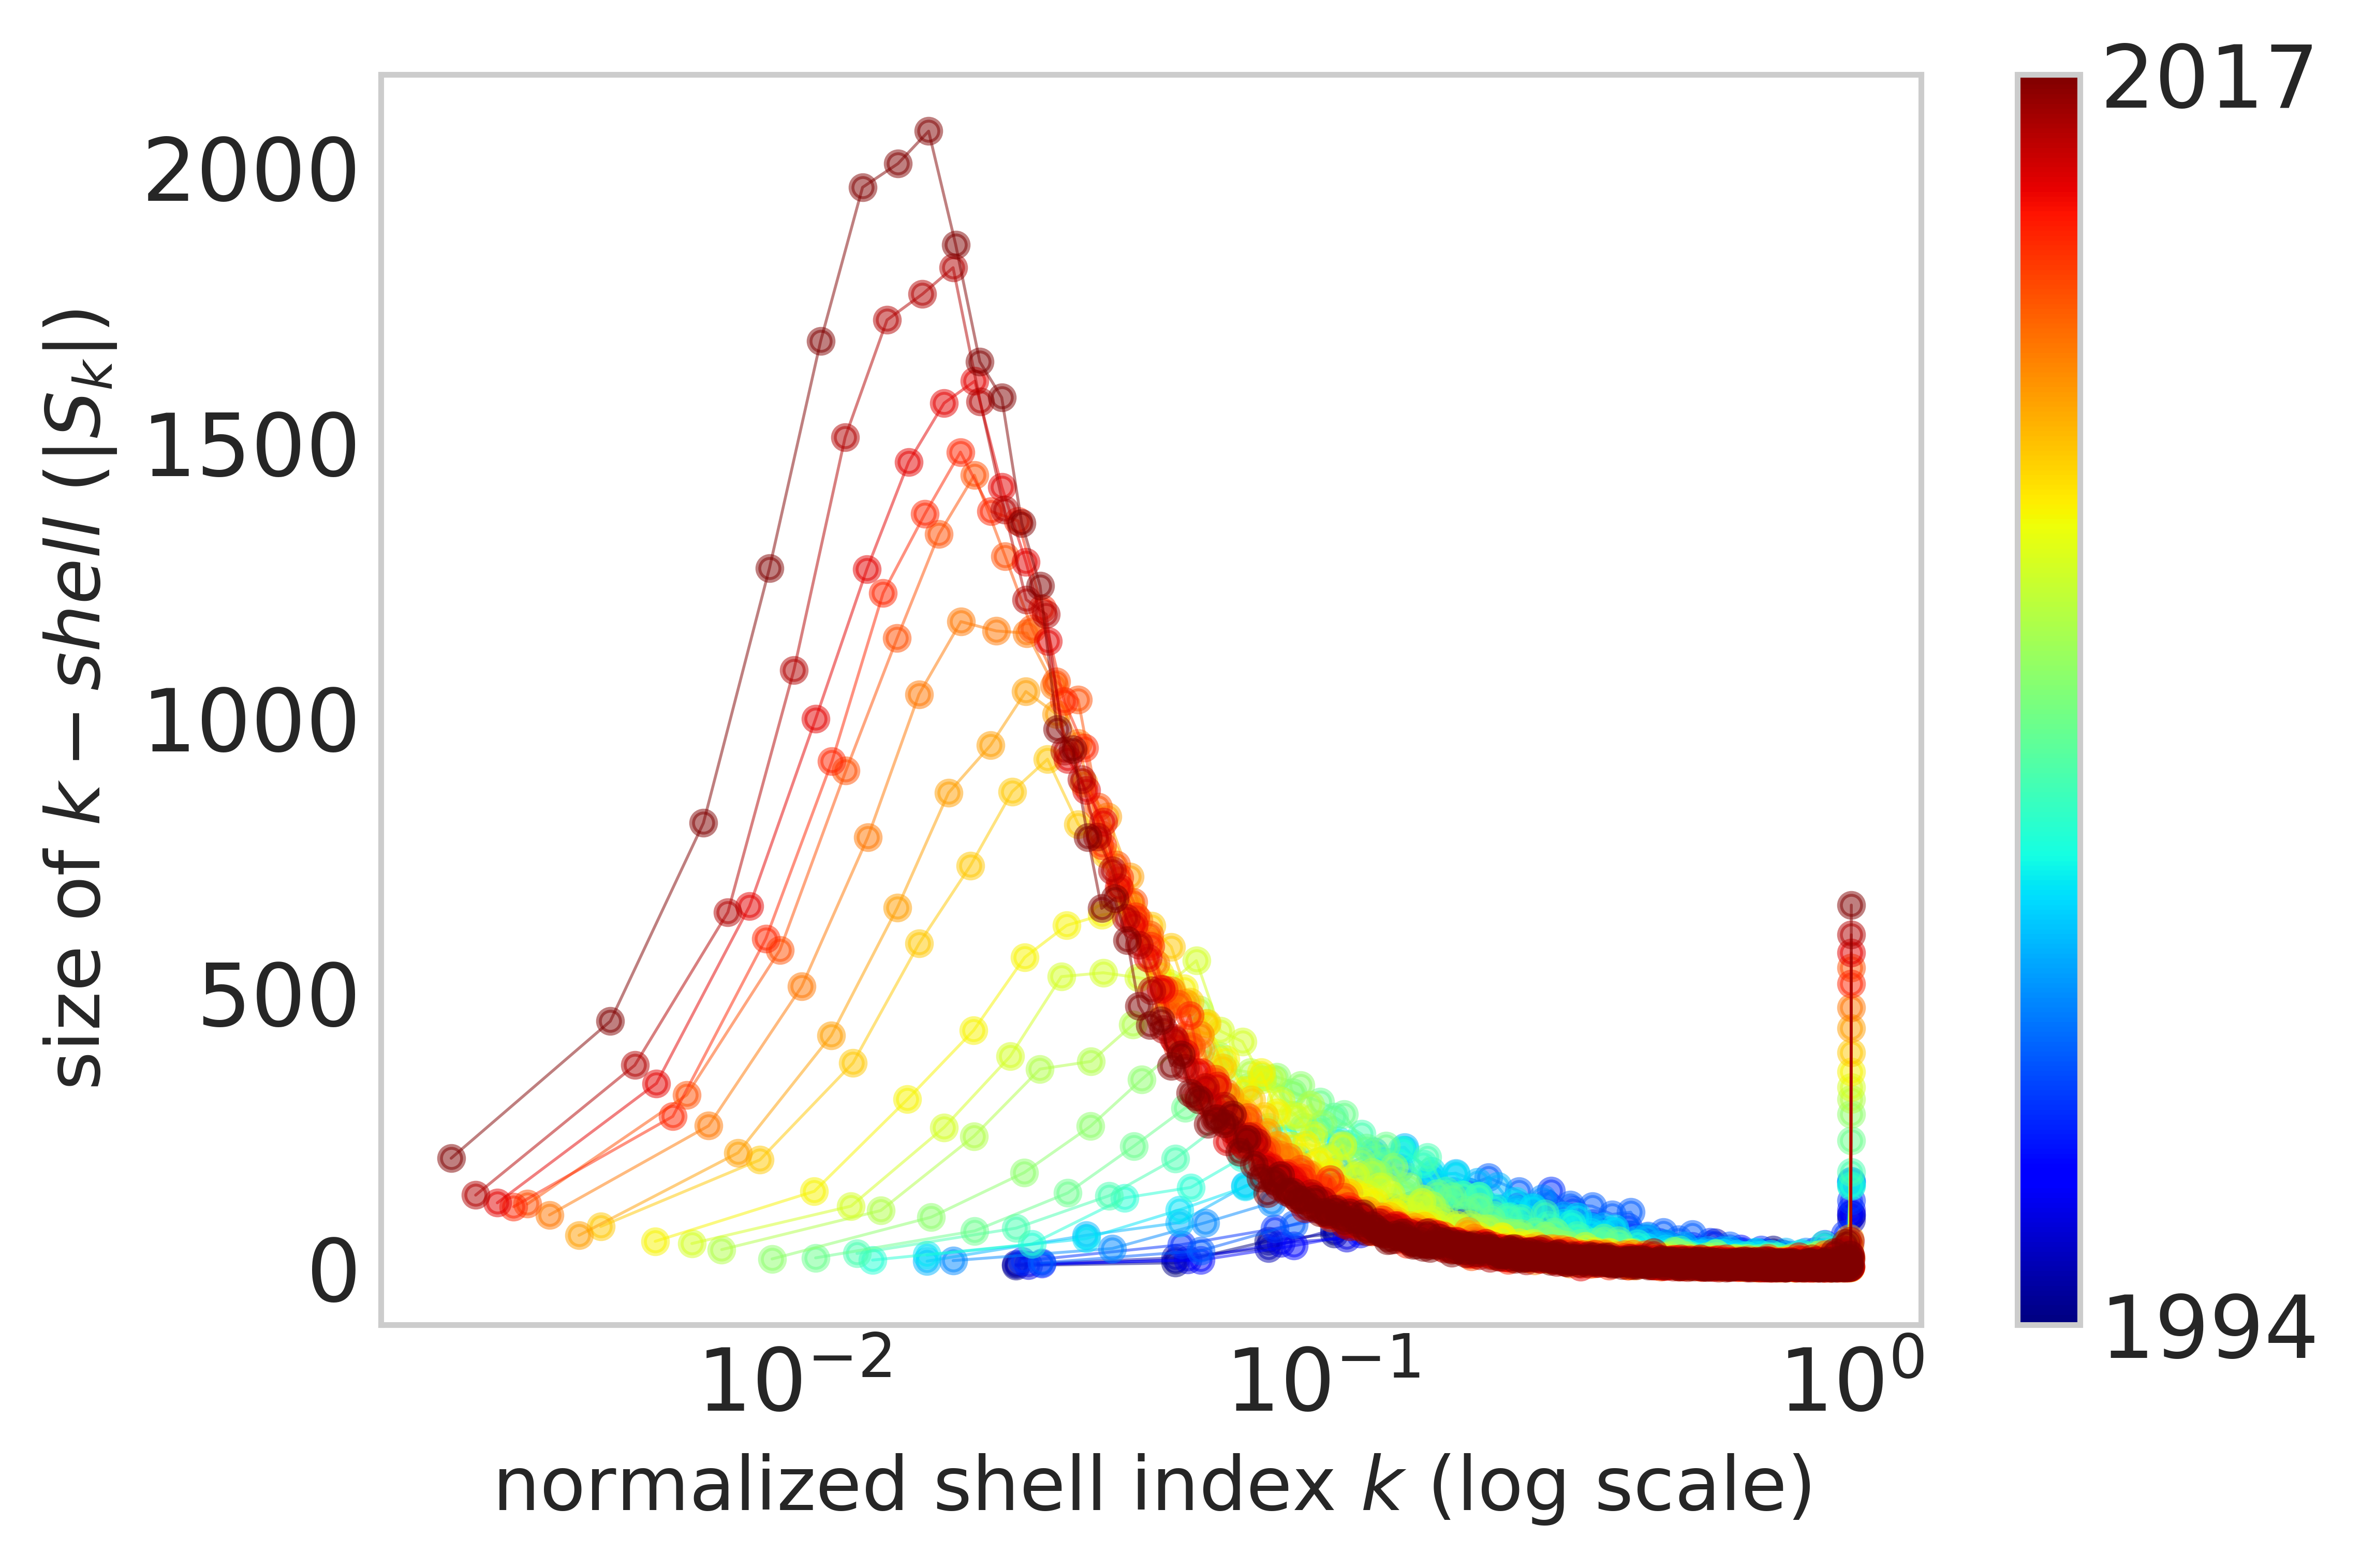

In [79]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

colors = plt.cm.jet(np.linspace(0,1,len(years)))
cmap = mpl.cm.ScalarMappable(cmap=mpl.cm.jet)
cmap.set_array([])
max_values=[]
fig, ax = plt.subplots(dpi=800)
for year in years:
    X=list(k_decomposition_size[year].keys())
    X=[x/float(max(X)) for x in X]
    Y=list(k_decomposition_size[year].values())
    max_values+=[[max(Y),Y[-1],X[Y.index(max(Y))],list(k_decomposition_size[year].keys())[Y.index(max(Y))],len(graphs_year[year])]]
    ax.semilogx(X,Y, 'k',marker='o',color=colors[years.index(year)],alpha=0.5,markersize=4,fillstyle='full',markeredgewidth=1,clip_on=True,linewidth=0.5,label=year)

#fig, ax = plt.subplots(dpi=100)
#for i, yi in enumerate(y.T):
#    ax.plot(x, yi, c=cmap.to_rgba(i + 1))
cbar=fig.colorbar(cmap,ticks=[-1,0,1],orientation='vertical')
cbar.ax.set_yticklabels(['1994','2017'])  # vertically oriented colorbar

#plt.show()

plt.grid(False)
#plt.legend(loc='best')
plt.ylabel(r'size of $k-shell \ (|S_k|)$',fontsize=13)
plt.xlabel(r'normalized shell index $k$ ($\log$ scale)',fontsize=13)
plt.rcParams.update({'font.size': 10})
plt.savefig('k_shell_year.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [80]:
max_values

[[101, 98, 0.18421052631578946, 7, 1403],
 [118, 88, 0.15789473684210525, 6, 1414],
 [104, 97, 0.1388888888888889, 5, 1397],
 [113, 106, 0.23529411764705882, 8, 1328],
 [141, 123, 0.2702702702702703, 10, 2068],
 [165, 158, 0.20588235294117646, 7, 2133],
 [182, 155, 0.14, 7, 2614],
 [220, 159, 0.14285714285714285, 8, 3443],
 [232, 151, 0.10714285714285714, 6, 3324],
 [253, 149, 0.09859154929577464, 7, 3940],
 [275, 175, 0.10526315789473684, 8, 4420],
 [348, 232, 0.07692307692307693, 7, 5250],
 [408, 280, 0.05454545454545454, 6, 6196],
 [491, 307, 0.051094890510948905, 7, 7865],
 [559, 329, 0.057692307692307696, 9, 9402],
 [650, 357, 0.04371584699453552, 8, 10779],
 [925, 392, 0.03017241379310345, 7, 14617],
 [1048, 436, 0.027450980392156862, 7, 16544],
 [1175, 474, 0.020689655172413793, 6, 19741],
 [1441, 546, 0.0219435736677116, 7, 22788],
 [1483, 517, 0.02064896755162242, 7, 24520],
 [1612, 573, 0.02197802197802198, 8, 26727],
 [1818, 606, 0.02, 8, 30289],
 [2066, 660, 0.0179775280898

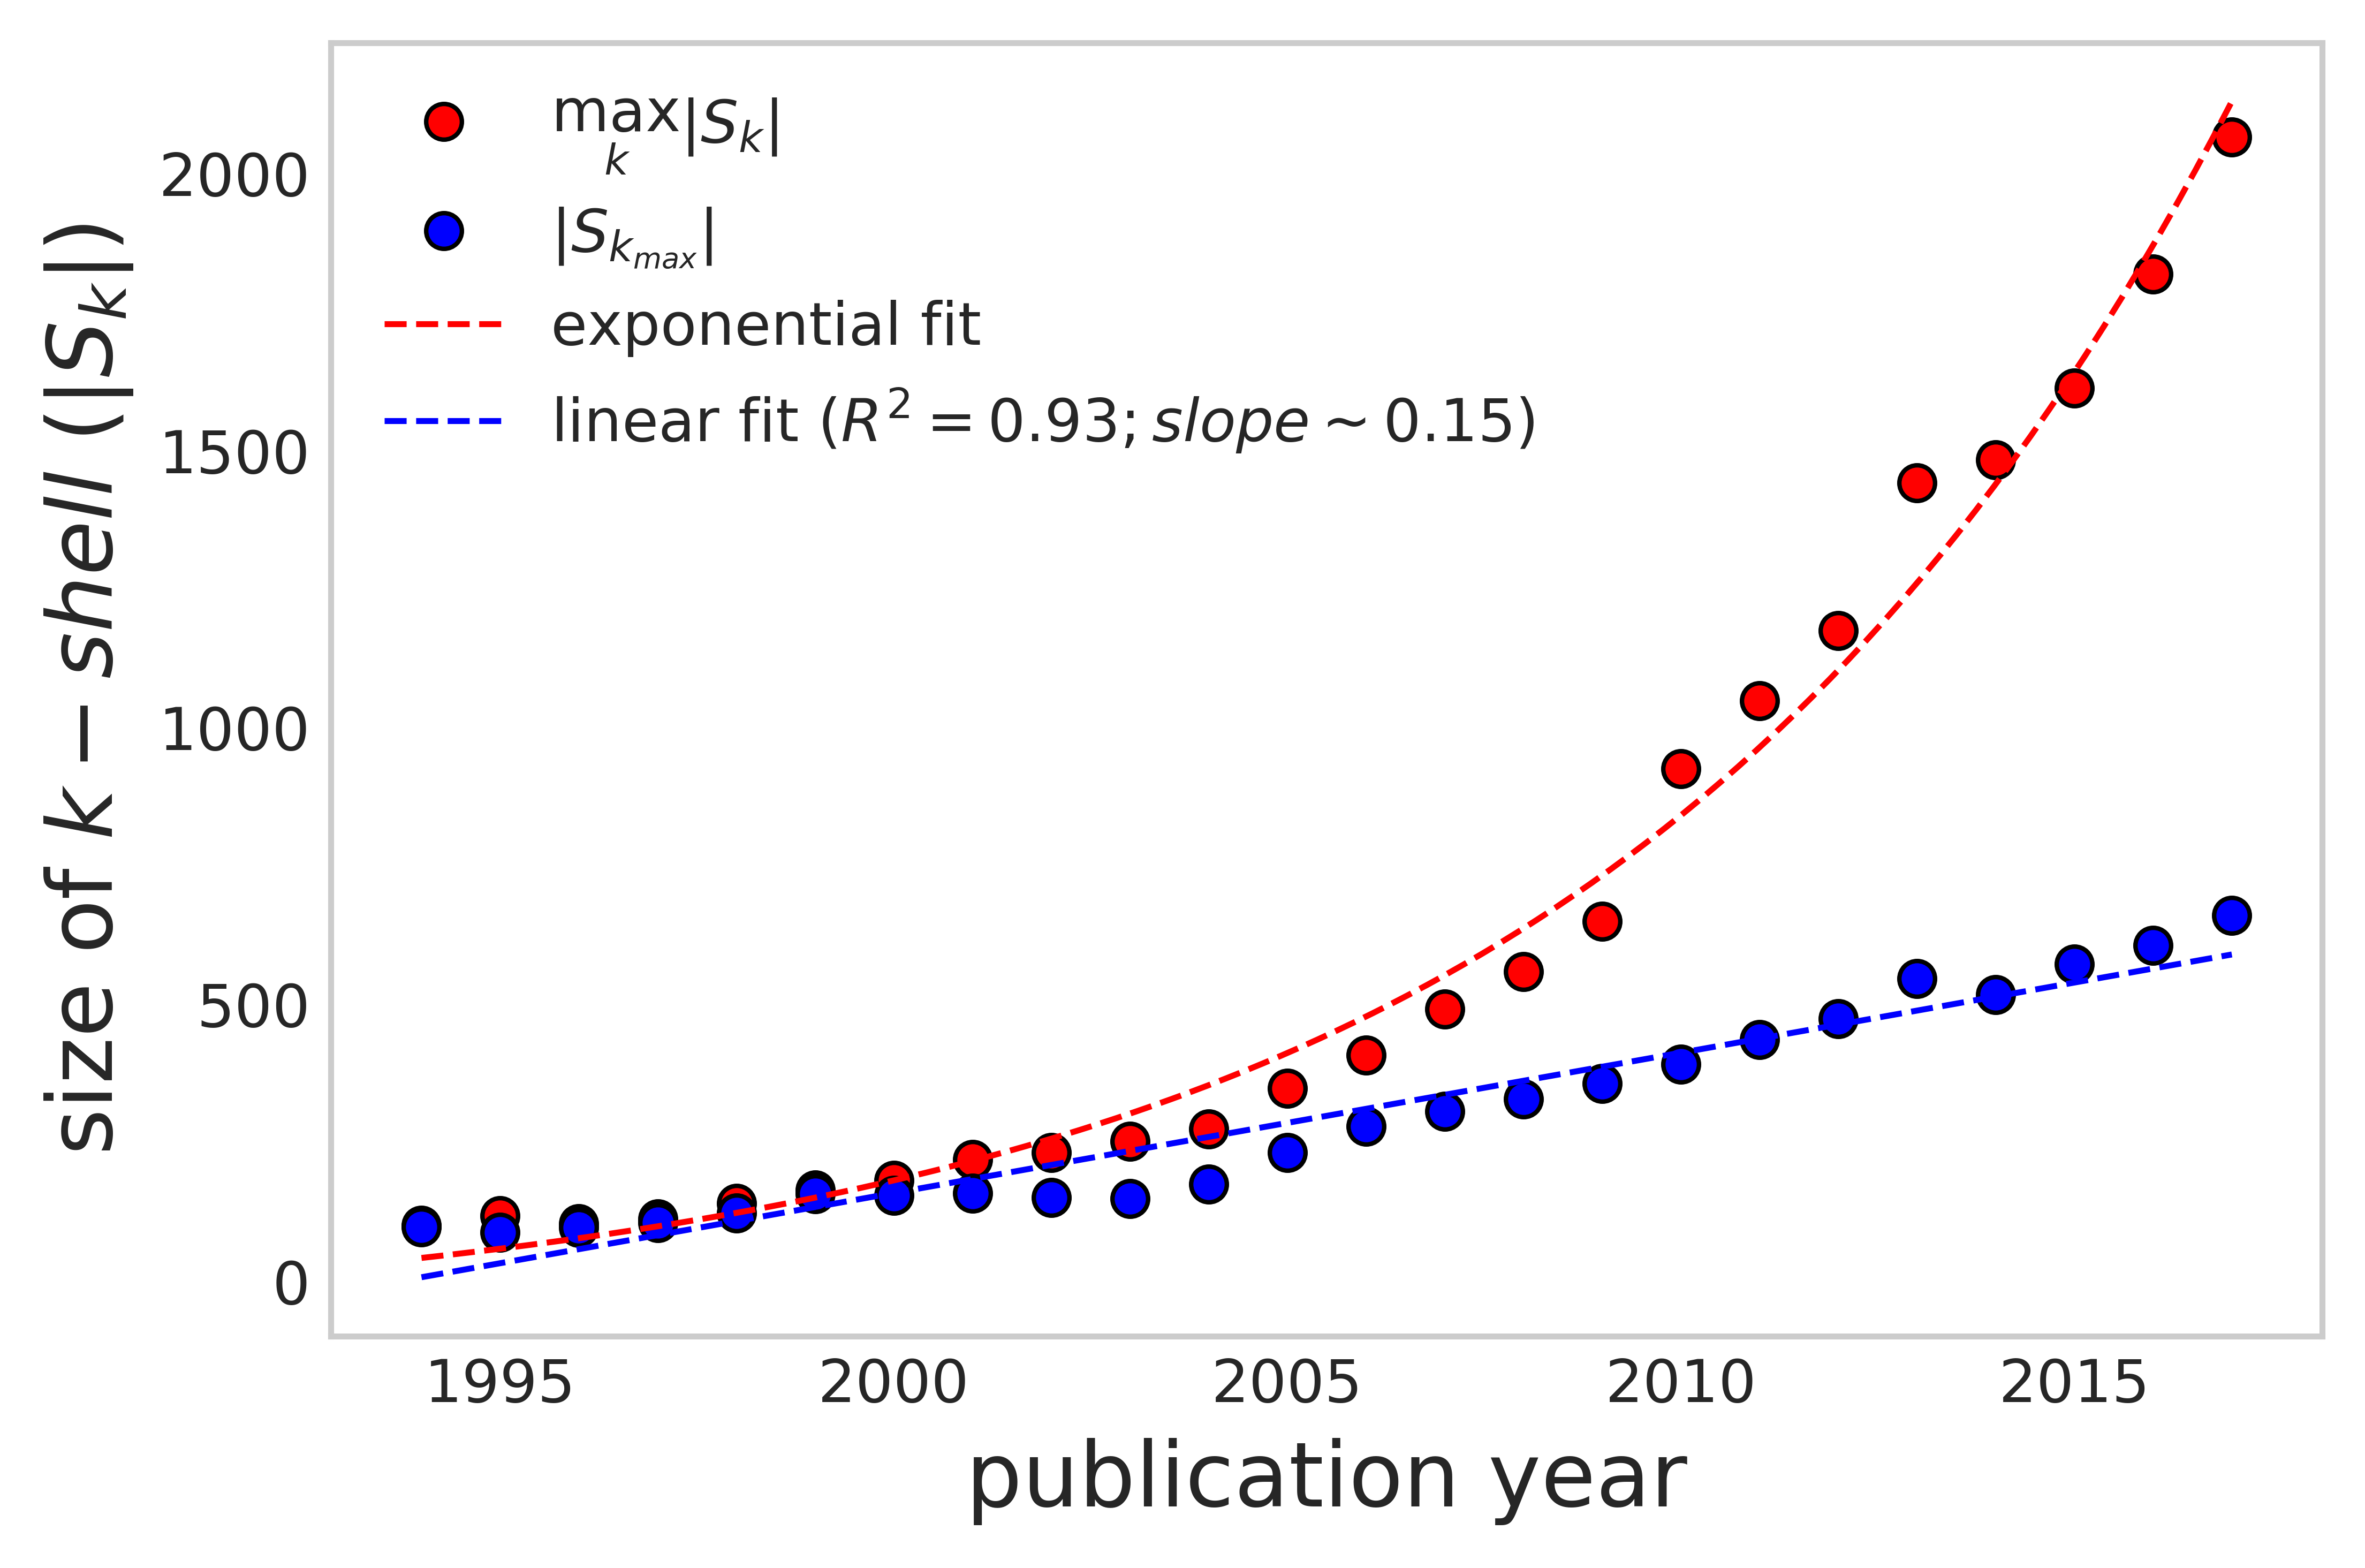

In [82]:
from scipy.optimize import curve_fit
from scipy import stats

def exponential_func(x, b, c,d):
    return np.exp(b*(x-c))+d

Y1=list(zip(*max_values))[0]
Y2=list(zip(*max_values))[1]

popt, pcov = curve_fit(exponential_func, [int(y) for y in years], Y1, p0=(1.2, 1994,0.2))

xx=np.linspace(1994,2017,100)
yy=exponential_func(xx,*popt)

slope, intercept, r_value, p_value, std_err = stats.linregress([int(y) for y in years],Y2)

yy2=[slope*x+intercept for x in xx]

x=np.array([int(y) for y in years])
y=np.array(Y2)
y = np.c_[y]
X = x #- x.mean()
Y = y #- y.mean()
only_slope = round(float((X.dot(Y)) / (X.dot(X))),2)

fig, ax = plt.subplots(dpi=800)
ax.plot([int(y) for y in years],Y1, 'r',marker='o',markeredgecolor='k',markersize=6,fillstyle='full',markeredgewidth=.75,clip_on=True,linewidth=0,label=r'$\max_k |S_k|$')
ax.plot([int(y) for y in years],Y2, 'b',marker='o',markeredgecolor='k',markersize=6,fillstyle='full',markeredgewidth=.75,clip_on=True,linewidth=0,label=r'$|S_{k_{max}}|$')
ax.plot(xx,yy,color='r',linestyle='--',clip_on=False,linewidth=1,label=r'exponential fit')
ax.plot(xx,yy2,color='b',linestyle='--',clip_on=False,linewidth=1,label=r'linear fit ($R^2=0.93; slope \sim 0.15$)')

plt.legend(loc='best')

ax.grid(False)
plt.ylabel(r'size of $k-shell \ (|S_k|)$',fontsize=15)
plt.xlabel(r'publication year',fontsize=15)
plt.rcParams.update({'font.size': 7})
plt.savefig('max_values.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [83]:
r_value**2

0.93485854136912

In [84]:
x=np.array([int(y) for y in years])
y=np.array(Y2)
y = np.c_[y]
X = x #- x.mean()
Y = y #- y.mean()
only_slope = round(float((X.dot(Y)) / (X.dot(X))),2)
only_slope

0.15

## clustering

In [87]:
Y4=list(zip(*max_values))[3] 
clustering={}
for year in years:
    G=graphs_year[year]
    print(year)
    clustering_G=nx.clustering(G)
    index=years.index(year)
    nodes=list(nx.k_shell(G,Y4[index]).nodes()) ## nodes of S_{k^*}
    nodes_max=list(nx.k_shell(G).nodes()) ## nodes of S_{k_{max}}
    nodes_crust=list(nx.k_crust(G).nodes()) ## nodes of G\S_{k_{max}}
    largest_cc_peak = list(max(nx.connected_components(G.subgraph(nodes)), key=len))
    clustering[year]=[np.mean([clustering_G[node] for node in nodes]),np.mean(list(clustering_G.values())),np.mean([clustering_G[node] for node in nodes_max]),np.mean([clustering_G[node] for node in largest_cc_peak]),np.mean([clustering_G[node] for node in nodes_crust])]

1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


ValueError: x and y must have same first dimension, but have shapes (18,) and (24,)

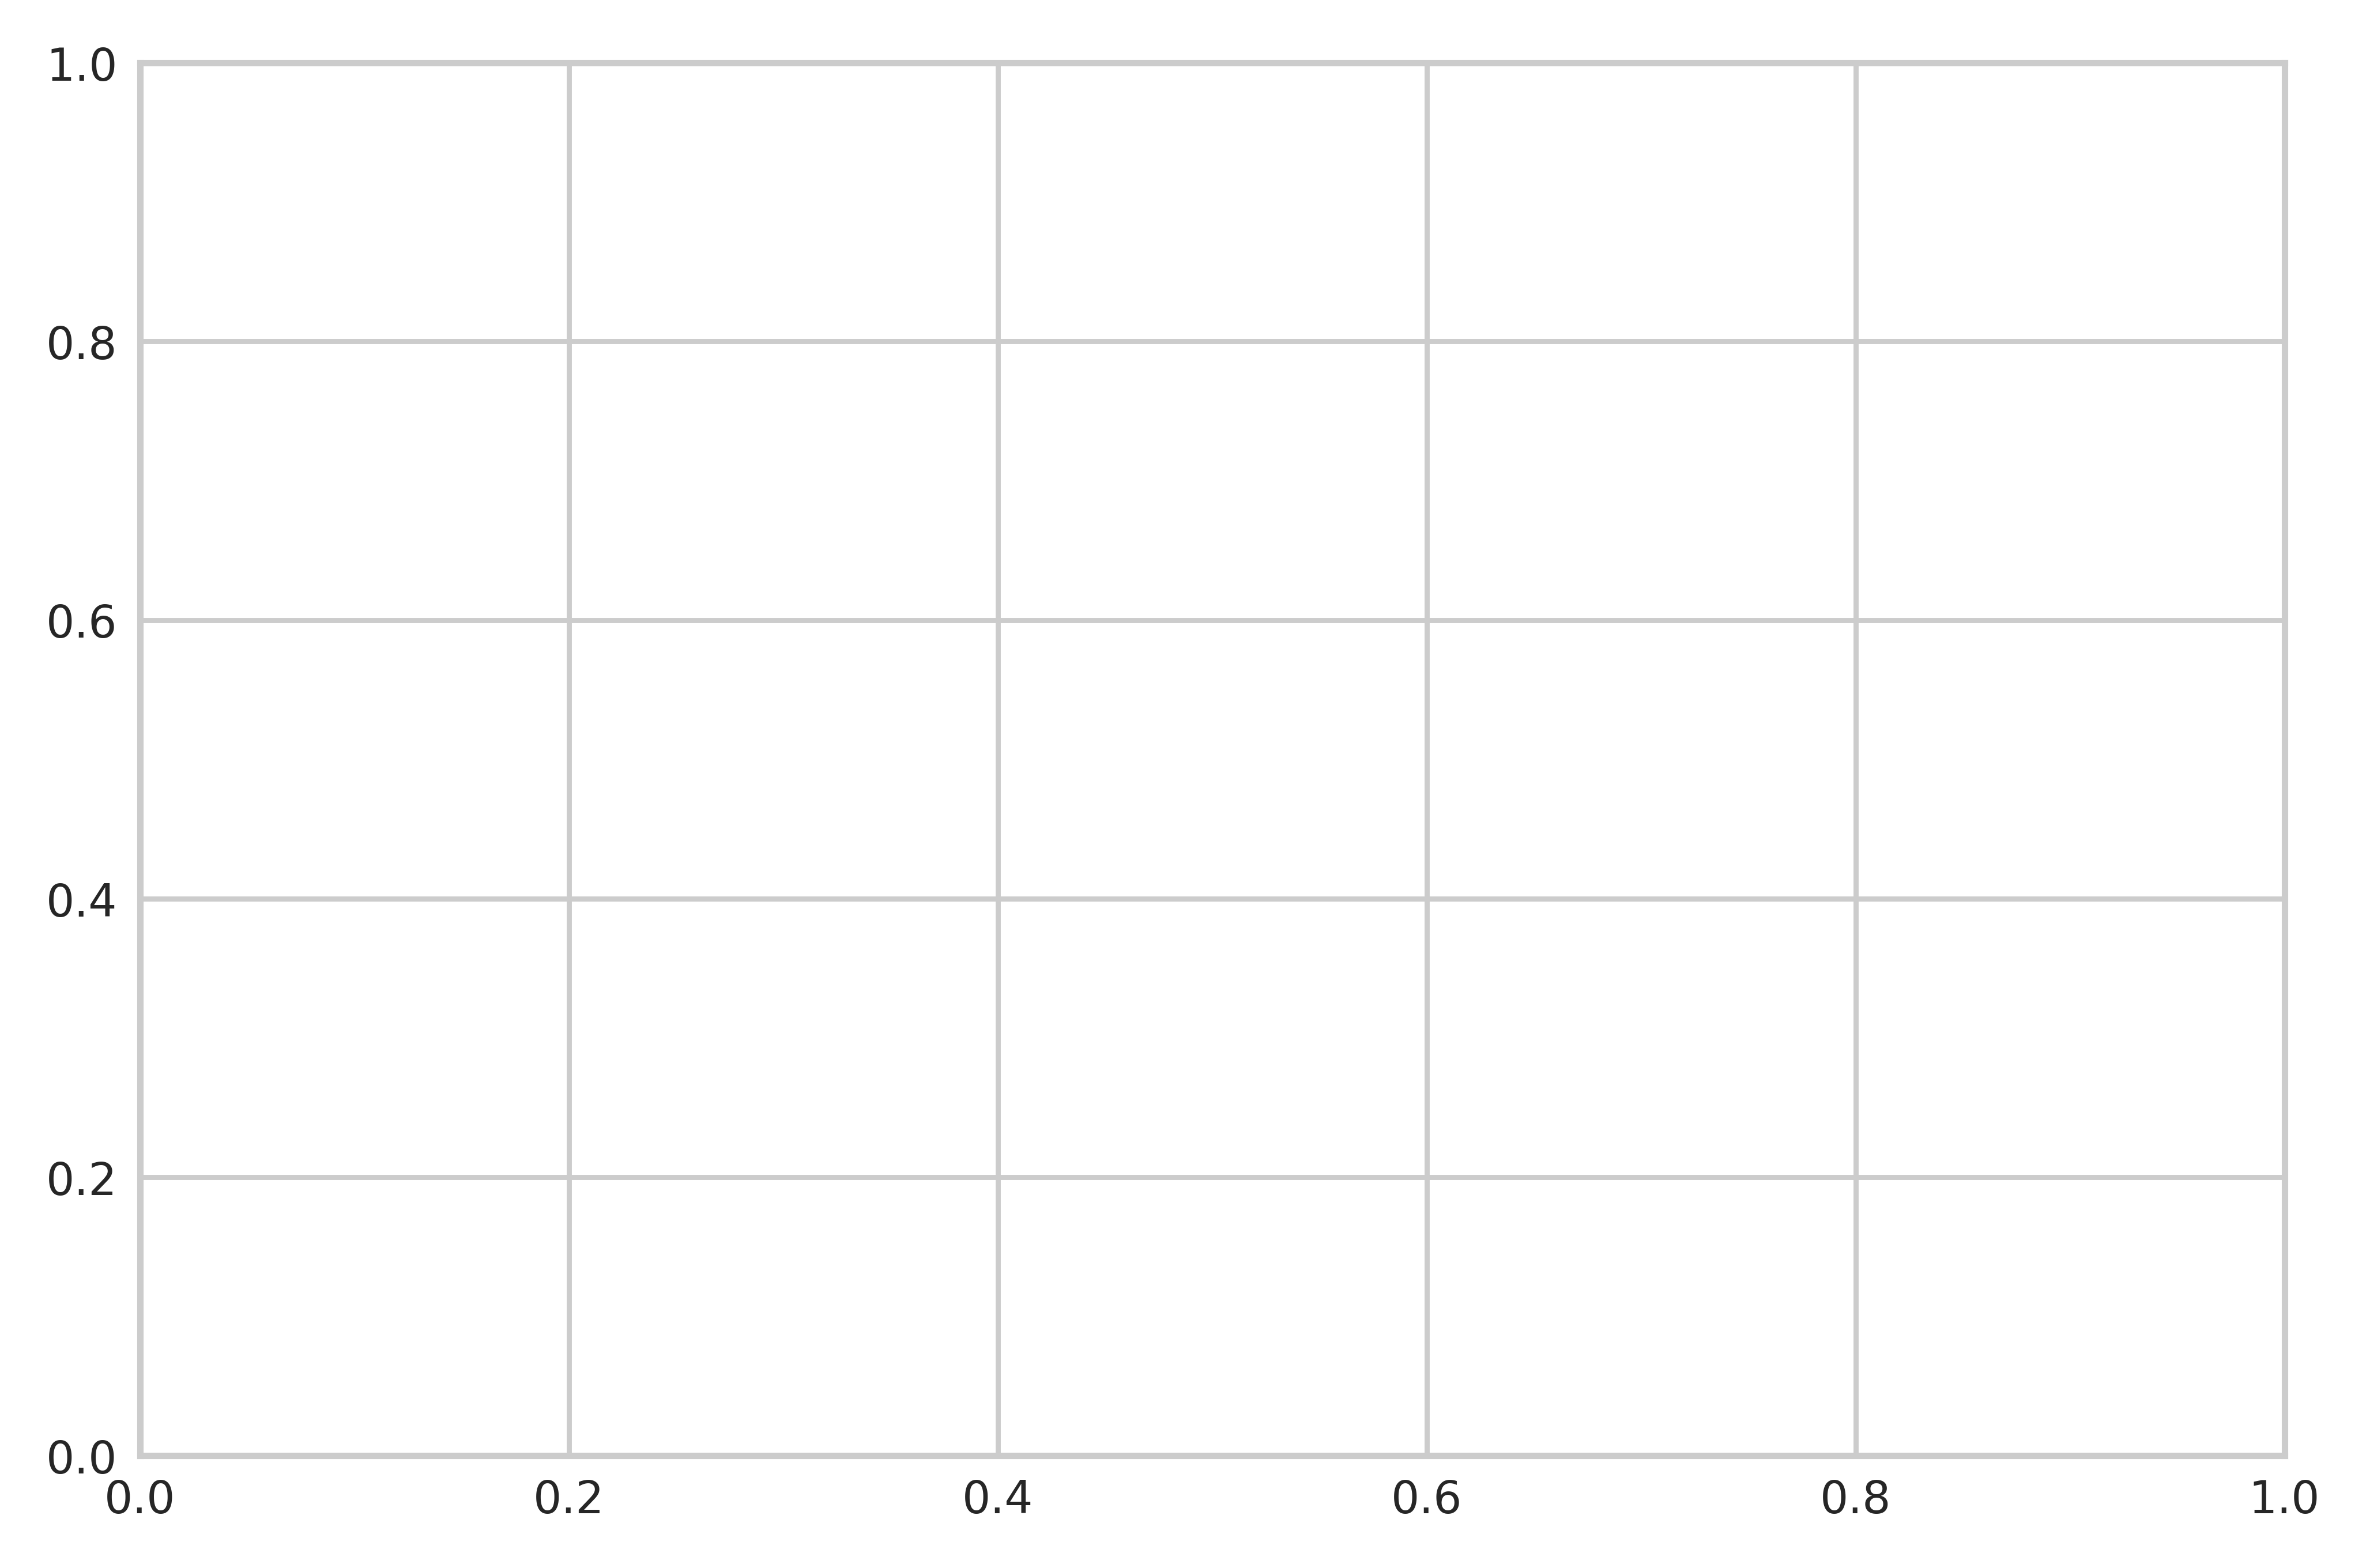

In [88]:
max_clustering=list(zip(*list(clustering.values())))[0]
global_clustering=list(zip(*list(clustering.values())))[1]
core_clustering=list(zip(*list(clustering.values())))[2]
largest_clustering=list(zip(*list(clustering.values())))[3]
crust_clustering=list(zip(*list(clustering.values())))[4]

fig, ax = plt.subplots(dpi=800)
ax.plot([int(y) for y in years],max_clustering, 'r',marker='o',markeredgecolor='k',markersize=6,fillstyle='full',markeredgewidth=.75,clip_on=True,linewidth=0.5,label=r'$S_{k*}$')
#ax.plot([int(y) for y in years[5:-1]],largest_clustering, 'm',marker='o',markeredgecolor='k',markersize=6,fillstyle='full',markeredgewidth=.75,clip_on=True,linewidth=0.5,label=r'largest component of $S_{k*}$')
ax.plot([int(y) for y in years],global_clustering, 'b',marker='o',markeredgecolor='k',markersize=6,fillstyle='full',markeredgewidth=.75,clip_on=True,linewidth=0.5,label=r'$G$')
ax.plot([int(y) for y in years],core_clustering, 'green',marker='o',markeredgecolor='k',markersize=6,fillstyle='full',markeredgewidth=.75,clip_on=True,linewidth=0.5,label=r'$S_{k_{max}}$')
ax.plot([int(y) for y in years],crust_clustering, 'orange',marker='o',markeredgecolor='k',markersize=6,fillstyle='full',markeredgewidth=.75,clip_on=True,linewidth=0.5,label=r'$G \ \backslash \ S_{k_{max}}$')

ax.legend(loc='best')
#ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4),  shadow=True, ncol=2)
ax.grid(False)
plt.ylabel(r'average clustering coefficient $(\langle C \rangle)$',fontsize=11)
plt.xlabel(r'publication year',fontsize=11)
plt.rcParams.update({'font.size': 10})
plt.savefig('clustering.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [ ]:
clustering_core={}
core_max={}
for year in years:
    print(year)
    clustering_year={}
    G=graphs_year[year]
    core_numbers=nx.core_number(G)
    core_max[year]=Y4[years.index(year)]/float(max(set(list(core_numbers.values()))))
    for core in set(list(core_numbers.values())):
        shell_nodes=list({k: v for k, v in core_numbers.items() if v==core}.keys())
        clustering_year[core]=nx.average_clustering(G,shell_nodes)
    clustering_core[year]=clustering_year

In [ ]:
import powerlaw

colors={'1997':'r','2002':'green','2007':'b','2012':'m','2017':'yellow'}
fig, ax = plt.subplots(dpi=800)
for year in sorted(['1997','2002','2007','2012','2017'],reverse=True):

    x=list(clustering_core[year].keys())
    y=list(clustering_core[year].values())[1:]

    x=[xx/float(max(x)) for xx in x][1:]

    ax.semilogx(x,y, colors[year],marker='o',alpha=0.65,markeredgecolor='k',markersize=5,fillstyle='full',markeredgewidth=.75,clip_on=True,linewidth=0.5,label=year)
    #ax.loglog(core_max[year],y[x.index(core_max[year])],'k',marker='x',markersize=10)
    plt.axvline(x=core_max[year], color=colors[year], linestyle='--',linewidth=0.5)
    #ax.plot(xx,yy,color='r',linestyle='--',clip_on=False,linewidth=1,label=r'exponential fit (1998-2017)')

plt.legend(loc='best')

ax.grid(False)
plt.ylabel(r'average clustering coefficient $(\langle C \rangle)$ of $S_k$',fontsize=9)
plt.xlabel(r'normalized shell index $k$ ($\log$ scale)',fontsize=9)
plt.rcParams.update({'font.size': 10})
plt.savefig('core_clustering.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [ ]:
alpha={}
for year in years:

    x=list(clustering_core[year].keys())
    y=list(clustering_core[year].values())[1:]
    
    fit = powerlaw.Fit(y,xmin=core_max[year])
    alpha[year]=fit.alpha